# Price of Airbnb in Seattle by density and size

## Business Understanding: What factors impact how much one can charge for an Airbnb in Seattle?

The goal of both notebooks is to bring to light factors that influlence price of an Airbnb in Seattle, with the goal of informing how a new lister should evlauate their property when they charge for an Airbnb. This notebook asks about two specific factors, density of Airbnbs within a zipcode, and size of Airbnb, proxied by bedrooms. 

## Data Understanding

The data in the Seattle Airbnb set is made of three separate files that may be joined by virture of a shared unique ID. These files provide numberical, categorical, and descriptive information about the Airbnbs listed in Seattle.

In [61]:
#importing libraries and loading files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')

df_listings = pd.read_csv(r'/Users/trish/Desktop/UDS/listings.csv')
df_calendar = pd.read_csv('/Users/trish/Desktop/UDS/calendar.csv')
df_reviews = pd.read_csv(r'/Users/trish/Desktop/UDS/reviews.csv')

## Data Preparation

In order to prepare the data, files need to be merged, some columns need their data types changed, missing values must be handled, and a dataframe that can answer my questions of interest regarding density and size must be created. This is done below.

In [62]:
#rename df_calendar unique id to match that of df_listings and merge dataframes
df_calendar.rename(columns={"listing_id": "id"}, inplace=True)
df = pd.merge(df_listings, df_calendar, on='id')

In [63]:
#onvert price to float
def fix_price(df, col):
    ''' 
    This function will remove dollar signs, extra zeros, commas from the given column in the given dataframe,
    and convert the column to float.
    
    INPUT:
    df - pandas dataframe
    col - column containing object with price structure to be removed
    
    OUTPUT:
    df - the input dataframe with the chose column replaced with a numerical value
    '''
    df[col] = df[col].str.replace('$','').str.replace('.00','').str.replace(',','')
    df[col] = pd.to_numeric(df[col])
    return df

In [64]:
fix_price(df, 'price_y')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date,available,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-04,t,85.0
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-05,t,85.0
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-06,f,NaN
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-07,f,NaN
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-08,f,NaN
5,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-09,f,NaN
6,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-10,f,NaN
7,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-11,f,NaN
8,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-12,f,NaN
9,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-13,t,85.0


In [65]:
#a quick look at correlations with price shows size features like square feet, guests, bedrooms 
#and bathrooms have highest values
df.corrwith(df['price_y'])

id                               -0.075130
scrape_id                              NaN
host_id                          -0.071449
host_listings_count               0.203343
host_total_listings_count         0.203343
latitude                         -0.036896
longitude                        -0.128156
accommodates                      0.668591
bathrooms                         0.490136
bedrooms                          0.606658
beds                              0.591934
square_feet                       0.509503
guests_included                   0.417417
minimum_nights                    0.011925
maximum_nights                    0.009103
availability_30                   0.010667
availability_60                   0.000608
availability_90                  -0.005847
availability_365                 -0.009178
number_of_reviews                -0.096978
review_scores_rating              0.080133
review_scores_accuracy            0.021328
review_scores_cleanliness         0.092098
review_scor

In [66]:
#create data frame holding count of airbnb and avereage airbnb price for each zipcode
df_zipprice1 = df.groupby(['zipcode']).mean()['price_y'].to_frame(name = 'avg_price')
zip_vals1 = df.zipcode.value_counts().to_frame(name = 'count')
df_zipprice1.reset_index()
zip_vals1 = zip_vals1.reset_index()
zip_vals1.rename(columns = {'index':'zipcode'}, inplace=True)
df_zip1 = pd.merge(zip_vals1, df_zipprice1, on='zipcode')

In [67]:
df_zip1

,zipcode,count,avg_price
0,98122,153300,130.127871
1,98103,143810,128.549553
2,98102,123735,131.021251
3,98105,82125,106.246132
4,98109,73730,168.011990
5,98101,73365,198.489033
6,98144,73000,110.029605
7,98121,71540,198.141487
8,98107,65700,127.811590
9,98115,64970,107.275285


## Data Analysis

Now we can begin analyzing the data. I start with a quick visualization to show distributions of price, then move on to my questions about the relationship between desnity of Airbnbs in a zipcode and their price, and whether this relationship is mediated by the size of the Airbnb.

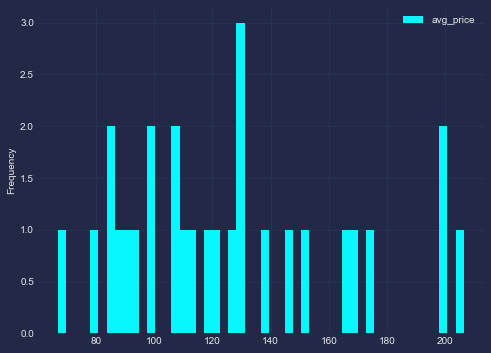

In [68]:
#distribution of average price in the avg price per zipcode table
#appears bimodal, with a second spike around the 200 range
df_zip1.plot.hist(figsize=(8,6),bins=50, x='count')

Text(0.5, 1.0, 'Avg Price of Airbnb by Zipcode Density')

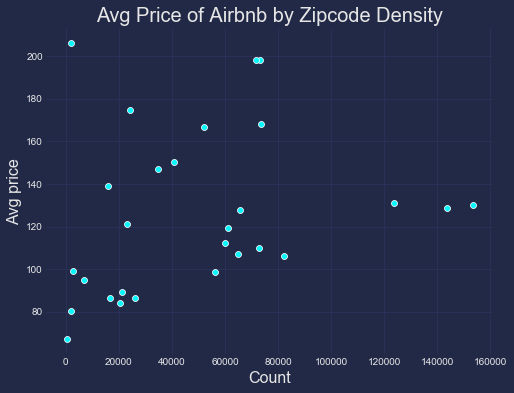

In [69]:
#scatterplot of relationship between number of airbnbs in a zipcode and their price
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_zip1, x = 'count', y = 'avg_price', legend=False)
plt.xlabel("Count", size=16)
plt.ylabel("Avg price", size=16)
plt.title("Avg Price of Airbnb by Zipcode Density", size=20)

In [70]:
#pearson correlation value for count and average price
df_zip1['count'].corr(df_zip1['avg_price'], method='pearson')

0.23570741431522463

In [71]:
#spearman correlation value for count and average price
#the spearman correlation performs better because the zipcode data is not continuous, but nominal
df_zip1['count'].corr(df_zip1['avg_price'], method='spearman')

0.4056384327024549

In [72]:
#creating a dataframe including bedrooms to see if impact of zipcode holds steady when size is 
#taken into account
df_zip2 = df[['zipcode', 'price_y','bedrooms']]
df_zip2.head()

,zipcode,price_y,bedrooms
0,98119,85.0,1.0
1,98119,85.0,1.0
2,98119,NaN,1.0
3,98119,NaN,1.0
4,98119,NaN,1.0


Text(0.5, 1.0, 'Price Airbnb by Number of Bedrooms')

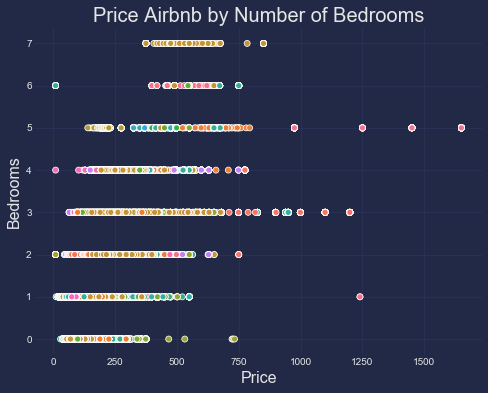

In [78]:
#scatterplot showing the relationship between bedrooms, pricee, and zipcode (as color). 
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_zip2, x = 'price_y', y = 'bedrooms', hue='zipcode', legend=False)
plt.xlabel("Price", size=16)
plt.ylabel("Bedrooms", size=16)
plt.title("Price Airbnb by Number of Bedrooms", size=20)

In [105]:
df_zip2.corr()

,price_y,bedrooms
price_y,1.000000,0.606658
bedrooms,0.606658,1.000000


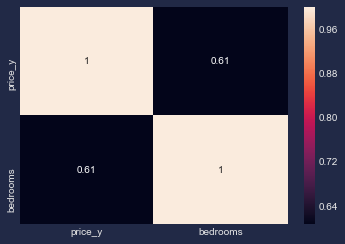

In [74]:
#heetmap coorelation matrix of bedroom and zipcode
correlation_mat = df_zip2.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [79]:
#correlation analysis shown in matrix
df_zip2.corr()

,price_y,bedrooms
price_y,1.000000,0.606658
bedrooms,0.606658,1.000000


In [75]:
#creating dataframe to drop price outliers
df_zip3 = df_zip2[df_zip2.price_y < 1000]
df_zip3.head()

,zipcode,price_y,bedrooms
0,98119,85.0,1.0
1,98119,85.0,1.0
9,98119,85.0,1.0
10,98119,85.0,1.0
14,98119,85.0,1.0


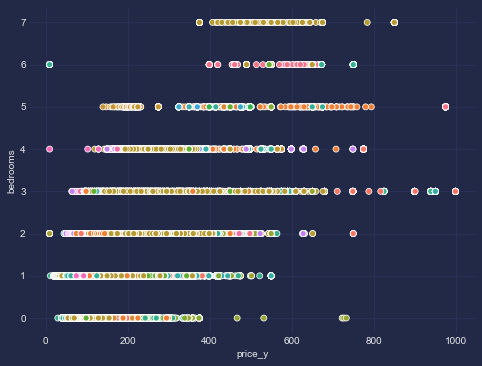

In [76]:
#scatterplot shown above, with high prices dropped
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_zip3, x = 'price_y', y = 'bedrooms', hue='zipcode', legend=False)

In [106]:
df_zip3.corr()

,price_y,bedrooms
price_y,1.000000,0.605298
bedrooms,0.605298,1.000000


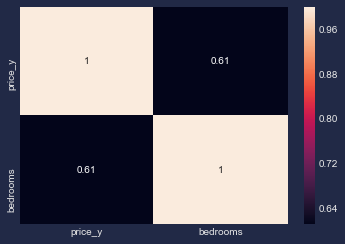

In [77]:
#this matrix shows that dropping the price outliers had no impact on the strength of the correlation
correlation_mat = df_zip3.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [80]:
#correlation analysis shown in matrix
#negligibly higher than correlation with price outliers present
df_zip3.corr()

,price_y,bedrooms
price_y,1.00000,0.61049
bedrooms,0.61049,1.00000


## Evaluate the Results

Though the results do show a positivee correlation between density of Airbnb in zipcode and listing pricee, they reveal a stronger positive correelation between number of bedrooms and listing price. Both of these factors should be taken into account when listing an Airbnb. A weakness in this analysis is that it did not run a 3-way correlatiion between zipcode density, bedroom and listing price. This would be a good next step for this analysis. 